# Basic Control Synthesis for Minigrid Environment

Change up to the main repo directory:

In [1]:
import os
os.chdir(os.path.join('..', '..'))

In [2]:
%load_ext autoreload
%autoreload 2
import gym
from IPython.display import Video

from wombats.automaton import Automaton
from wombats.systems import (StaticMinigridTSWrapper,
                             LavaComparison_noDryingOff)
from wombats.automaton import active_automata
from wombats.automaton import MinigridTransitionSystem
from wombats.utils import get_experiment_paths

# setting all paths
EXPERIMENT_NAME = 'MiniGrid_synthesis_manual_spec'

path_data = get_experiment_paths(EXPERIMENT_NAME)
EXPERIMENT_DIR = path_data['EXPERIMENT_DIR']
PDFA_MODEL_CONFIG_FILE = path_data['PDFA_MODEL_CONFIG_FILE']
GYM_MONITOR_LOG_DIR = path_data['GYM_MONITOR_LOG_DIR']

# reset the kernel's Automata class' experimental directory for all created
# Automaton objects.
#
# If you autoreload any code having to do with the automaton, then you will
# need to re-run this cell to get the right automaton data path back, as the
# reload will reset the base Automaton class' automata_data_dir property
Automaton.automata_data_dir = os.path.join(EXPERIMENT_DIR)

## Loading in the Specification

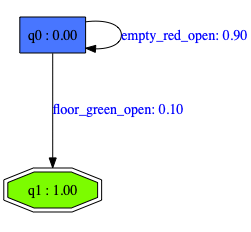

In [19]:
pdfa_specification = active_automata.get(automaton_type='PDFA',
                                         graph_data=PDFA_MODEL_CONFIG_FILE)
pdfa_specification.draw('_'.join([EXPERIMENT_NAME, 'PDFA']))

## Loading in the Minigrid Transition System

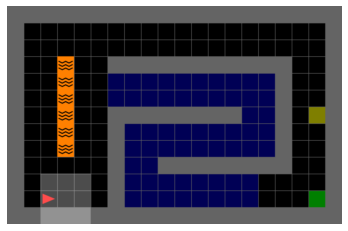

/Users/nicholasrenninger/anaconda3/envs/dfaInvestigations/lib/python3.7/site-packages/gym_minigrid/window.py:29: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  self.ax.set_xticks([], [])
/Users/nicholasrenninger/anaconda3/envs/dfaInvestigations/lib/python3.7/site-packages/gym_minigrid/window.py:30: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  self.ax.set_yticks([], [])


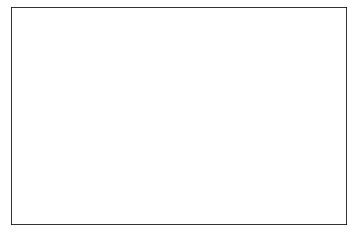

/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/systems/minigrid.py:717: RuntimeWarning: could not find any goal objects.
  warnings.warn(msg, RuntimeWarning)


In [60]:
# ENV_ID = 'MiniGrid-DistShift1-v0'
# ENV_ID = 'MiniGrid-DistShift2-v0'
# ENV_ID = 'MiniGrid-LavaGapS5-v0'
ENV_ID = 'MiniGrid-AlternateLavaComparison_AllCorridorsOpen_Wide-v0'

env = gym.make(ENV_ID)

env = StaticMinigridTSWrapper(env, actions_type='default',
                              monitor_log_location=GYM_MONITOR_LOG_DIR)
env.reset()
env.render_notebook()

minigrid_TS = active_automata.get(automaton_type='TS', graph_data=env,
                                  graph_data_format='minigrid')
# minigrid_TS.draw('_'.join([EXPERIMENT_NAME, ENV_ID, 'TS']))

In [50]:
minigrid_TS.observations

{'empty_red_open', 'floor_green_open', 'lava_red_open', 'water_blue_open'}

In [51]:
pdfa_specification.symbols

{'empty_red_open', 'floor_green_open'}

In [52]:
list(minigrid_TS.actions)

[<DiagStaticActions.northeast: 0>,
 <DiagStaticActions.northwest: 1>,
 <DiagStaticActions.southeast: 2>,
 <DiagStaticActions.southwest: 3>]

## Building the Product Automaton

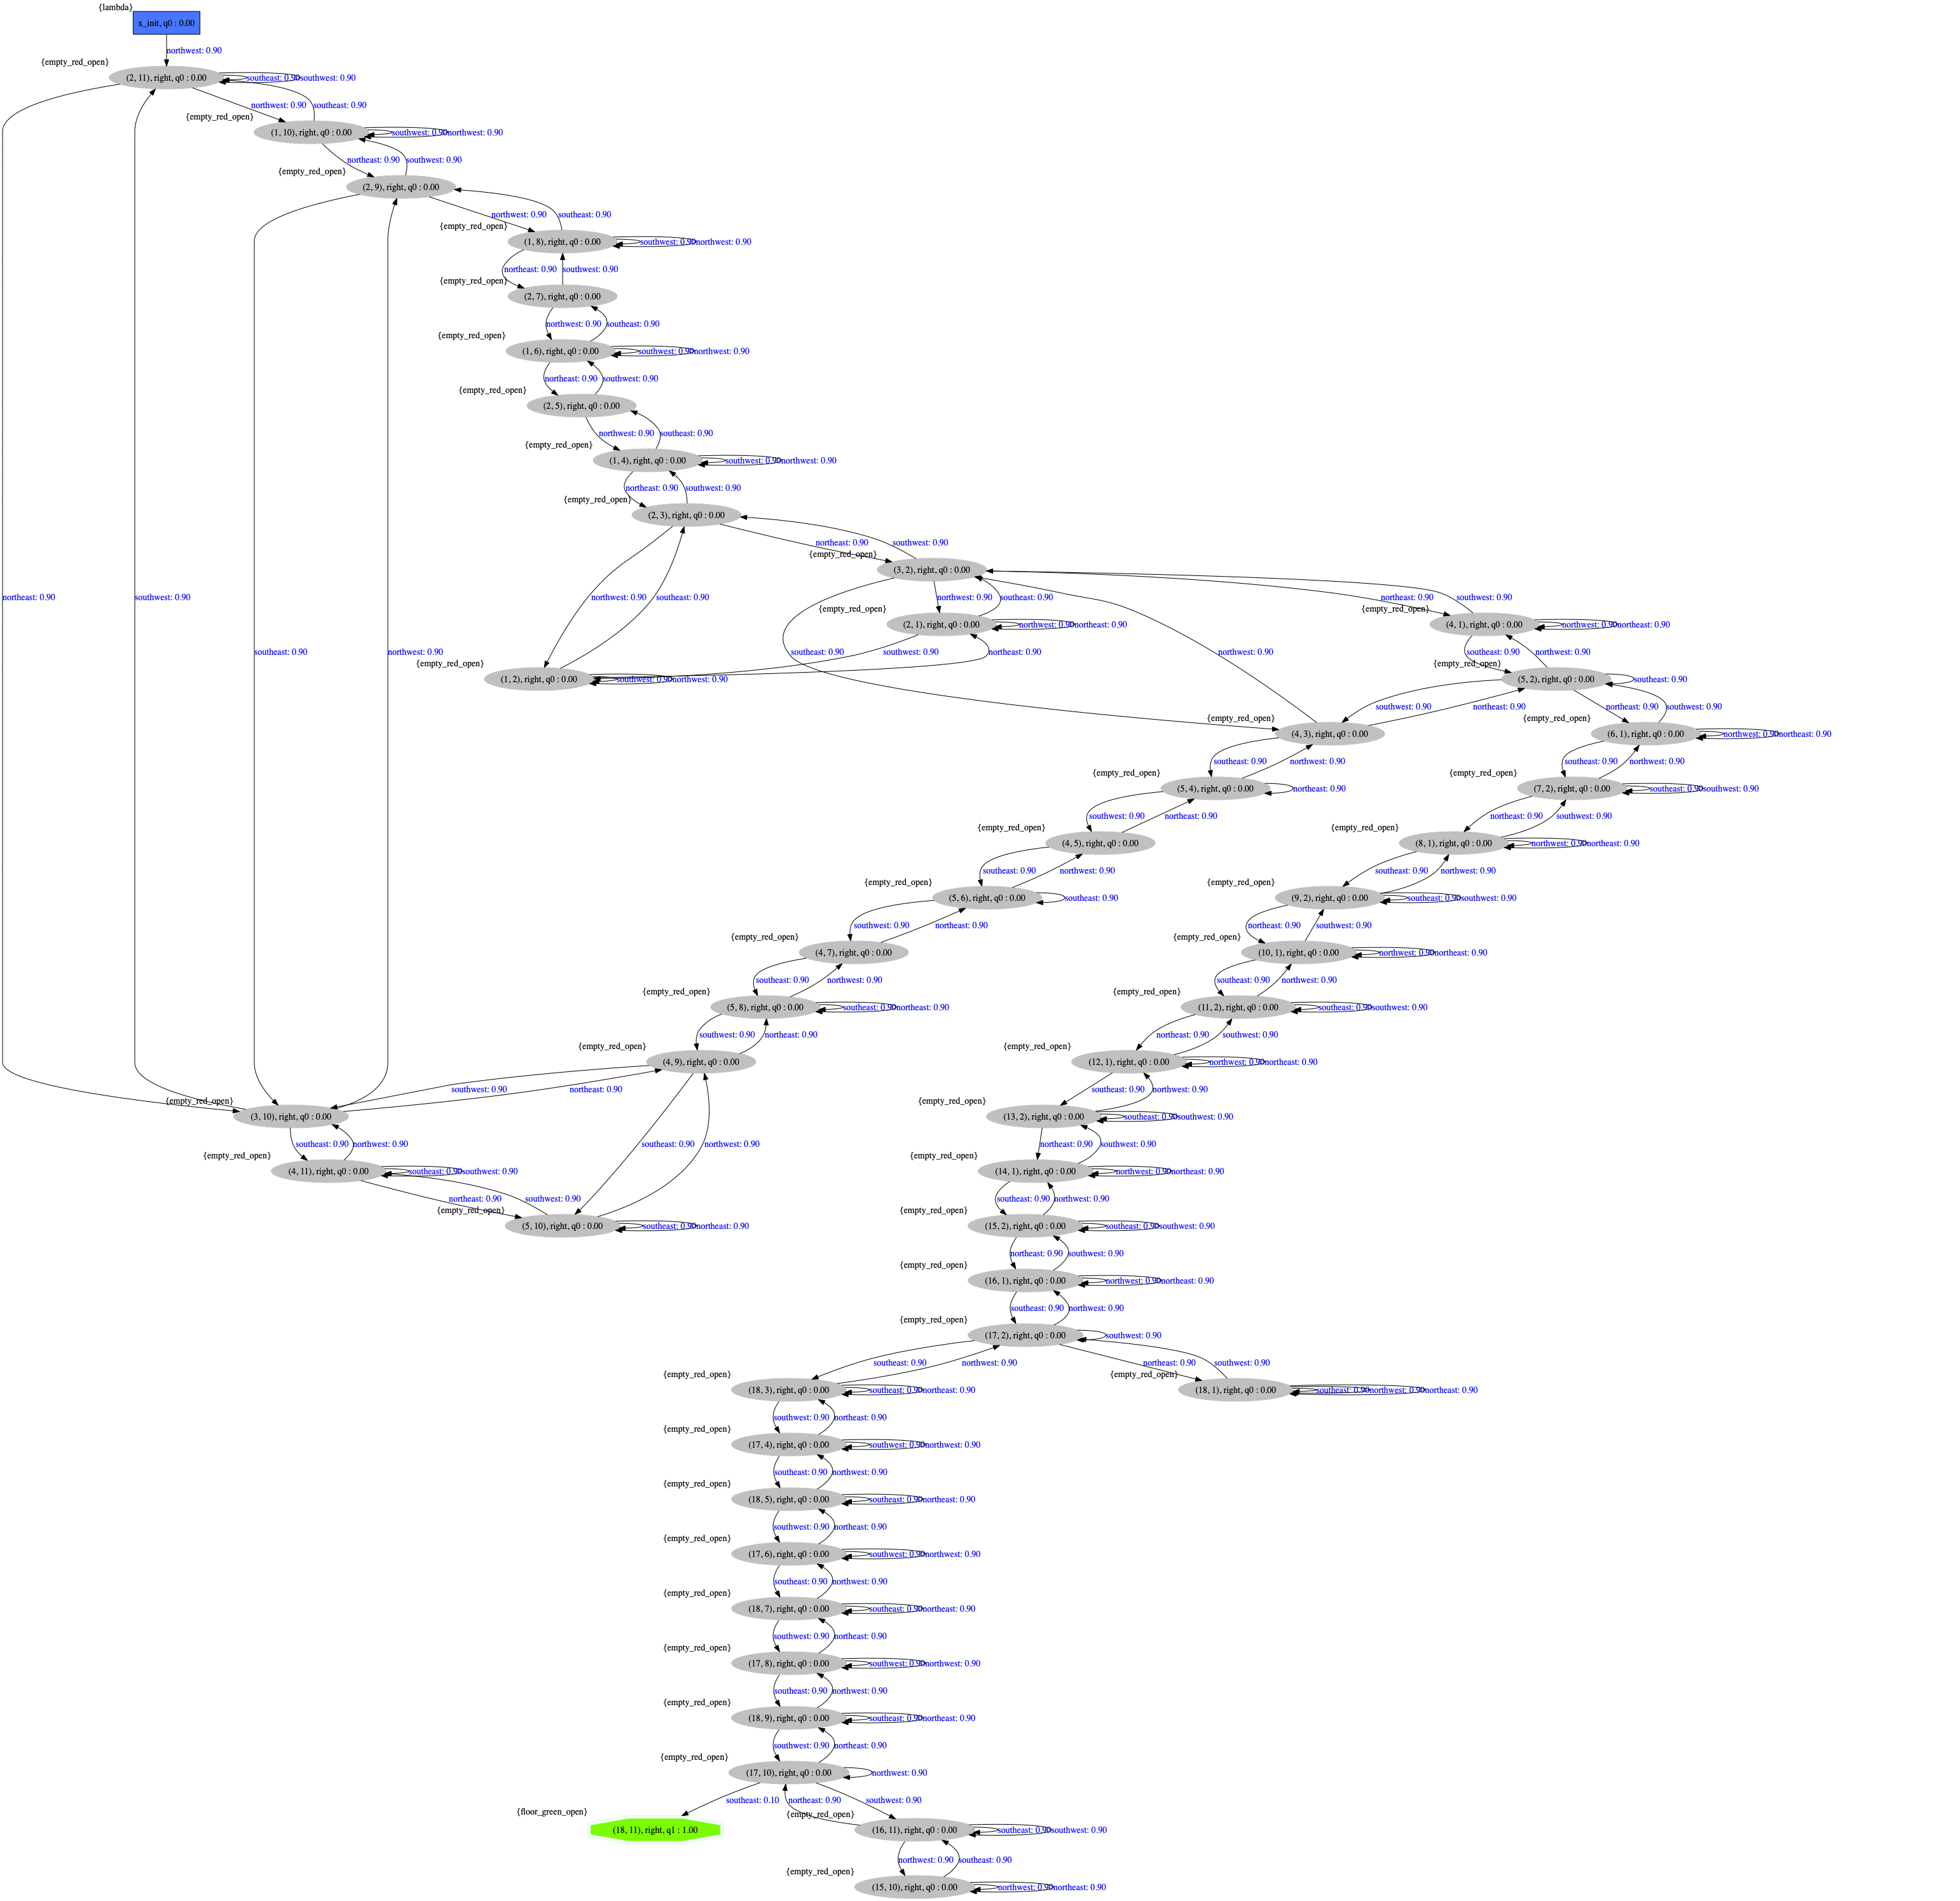

In [53]:
product = active_automata.get(automaton_type='Product',
                              graph_data=(minigrid_TS,
                                          pdfa_specification),
                             show_steps=False)
product.draw('_'.join([EXPERIMENT_NAME, ENV_ID, 'product']))

## Computing the Most-Probable, Possible Controller

In [54]:
%autoreload 2
(controls,
 prob_of_controls_under_spec) = product.compute_strategy()

print(f'Optimal Controls: {controls}')
print(f'Probability of Generated TS Observations in Spec: ' +
      f'{prob_of_controls_under_spec}')


Optimal Controls: ['northeast', 'northeast', 'northeast', 'northwest', 'northeast', 'northwest', 'northeast', 'northwest', 'northeast', 'northeast', 'southeast', 'northeast', 'southeast', 'northeast', 'southeast', 'northeast', 'southeast', 'northeast', 'southeast', 'northeast', 'southeast', 'southeast', 'southwest', 'southeast', 'southwest', 'southeast', 'southwest', 'southeast', 'southwest', 'southeast']
Probability of Generated TS Observations in Spec: 0.004239115827521625


## Applying Controller to System

In [55]:
output_string, visited_states, video_path = minigrid_TS.run(controls,
                                                            record_video=True)
print(output_string)
print(visited_states)
Video(video_path, embed=True, html_attributes="controls muted autoplay loop")

['empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'floor_green_open']
['(2, 11), right', '(3, 10), right', '(4, 9), right', '(5, 8), right', '(4, 7), right', '(5, 6), right', '(4, 5), right', '(5, 4), right', '(4, 3), right', '(5, 2), right', '(6, 1), right', '(7, 2), right', '(8, 1), right', '(9, 2), right', '(10, 1), right', '(11, 2), right', '(12, 1), right', '(13, 2), right', '(14, 1), right', '(15, 2), right', '(16, 1), right', '(17, 2), right', '(18, 3), right', '(17, 4), right', '(18, 5), right', 